### Problem Statement:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Implimentations:
**Please note that there are two target variables here:**

***1) Next_Tmax: Next day maximum temperature***

***2) Next_Tmin: Next day  minimum temperature***

Need to build model to predict next day highest and lowest temperature.



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

Imported Basic Library

In [64]:
df_temp=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df_temp.head()

station        Date  Present_Tmax  ...  Solar radiation  Next_Tmax  Next_Tmin
0      1.0  30-06-2013          28.7  ...      5992.895996       29.1       21.2
1      2.0  30-06-2013          31.9  ...      5869.312500       30.5       22.5
2      3.0  30-06-2013          31.6  ...      5863.555664       31.1       23.9
3      4.0  30-06-2013          32.0  ...      5856.964844       31.7       24.3
4      5.0  30-06-2013          31.4  ...      5859.552246       31.2       22.5

[5 rows x 25 columns]

Load Dataset and displayed top 5 rows.

In [3]:
df_temp.shape

(7752, 25)

In [4]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

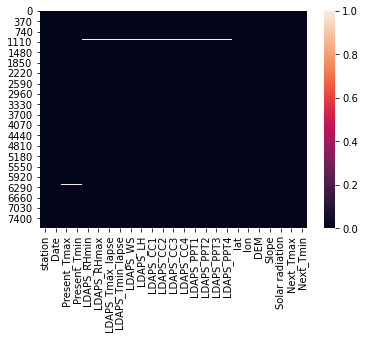

In [65]:
sns.heatmap(df_temp.isnull())

Lots of columns have Null values also displayed Graphysical representations.

In [5]:
df_temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except Date columns all columns are float64 dtype

In [6]:
for col in df_temp.columns:
    if df_temp[col].dtype=="float64":
       if df_temp[col].isnull().sum()>0:
         df_temp[col]=df_temp[col].fillna(df_temp[col].mean())

All float dtype columns null values are replaced by Mean of particular columns.

In [7]:
df_temp.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
df_temp.dropna(inplace=True)

Only 2 nul values are present in Date columns hance droped that rows.

In [9]:
df_temp.shape

(7750, 25)

In [10]:
df_temp['Date']=pd.to_datetime(df_temp['Date'])
df_temp['Month']=df_temp.Date.dt.month
df_temp['Day']=df_temp.Date.dt.day
df_temp['Year']=df_temp.Date.dt.year

Seprate Day, Month and years from date to convert object dtype to integer.

In [11]:
df_temp.drop(['Date'],axis=1,inplace=True)

As per aboveb seprated Day, Month and Year beacuse of droped Date columns.

In [12]:
df_temp

station  Present_Tmax  Present_Tmin  ...  Month  Day  Year
0         1.0          28.7          21.4  ...      6   30  2013
1         2.0          31.9          21.6  ...      6   30  2013
2         3.0          31.6          23.3  ...      6   30  2013
3         4.0          32.0          23.4  ...      6   30  2013
4         5.0          31.4          21.9  ...      6   30  2013
...       ...           ...           ...  ...    ...  ...   ...
7745     21.0          23.1          17.8  ...      8   30  2017
7746     22.0          22.5          17.4  ...      8   30  2017
7747     23.0          23.3          17.1  ...      8   30  2017
7748     24.0          23.3          17.7  ...      8   30  2017
7749     25.0          23.2          17.4  ...      8   30  2017

[7750 rows x 27 columns]

In [13]:
df_temp.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month                 int64
Day                   int64
Year                  int64
dtype: object

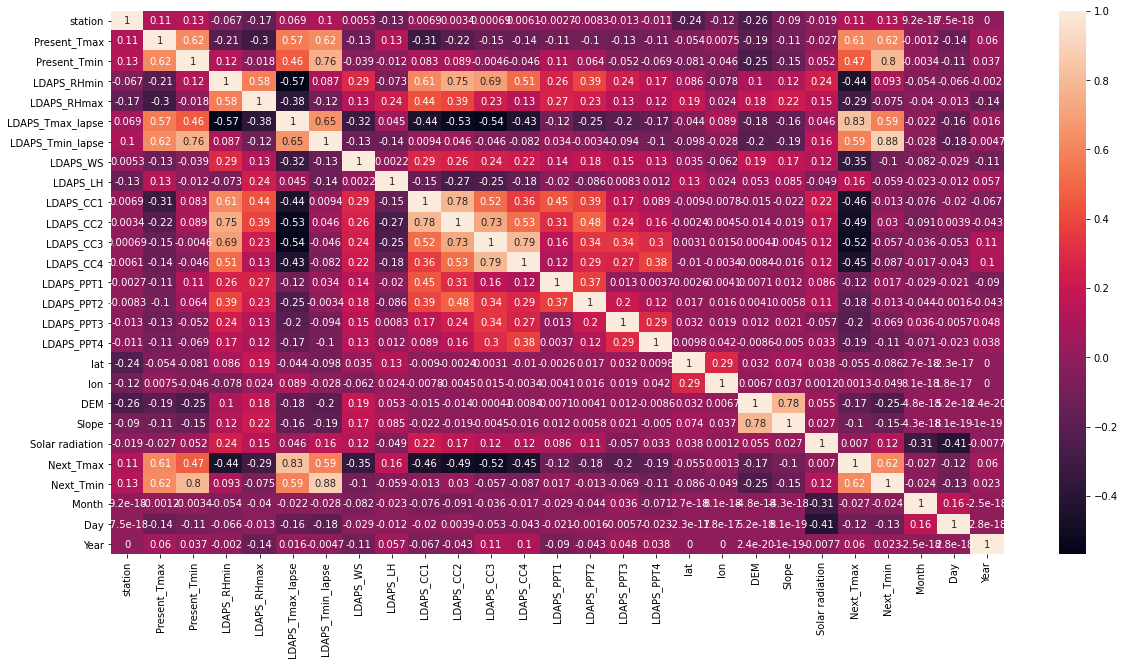

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df_temp.corr(),annot=True)

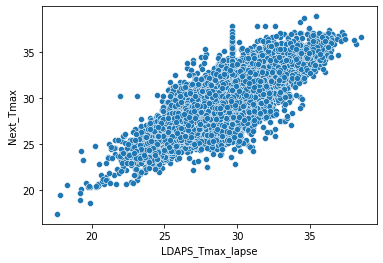

In [15]:
sns.scatterplot(x=df_temp['LDAPS_Tmax_lapse'],y=df_temp['Next_Tmax'])

LDAPS_Tmax_lapse and Next_Tmax has linear relationship to each others.

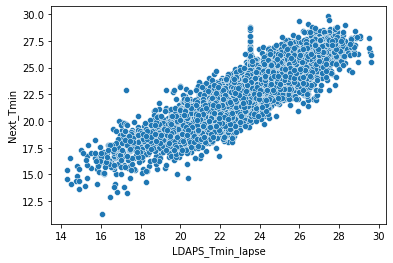

In [16]:
sns.scatterplot(x=df_temp['LDAPS_Tmin_lapse'],y=df_temp['Next_Tmin'])

LDAPS_Tmin_lapse and Next_Tmin has linear relationship to each others.

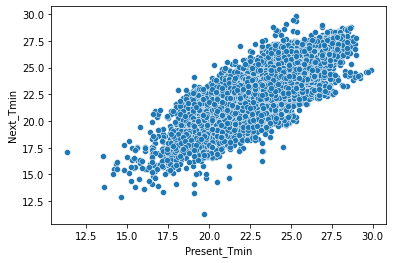

In [17]:
sns.scatterplot(x=df_temp['Present_Tmin'],y=df_temp['Next_Tmin'])

Present_Tmin and Next_Tmin has linear relationship to each others.

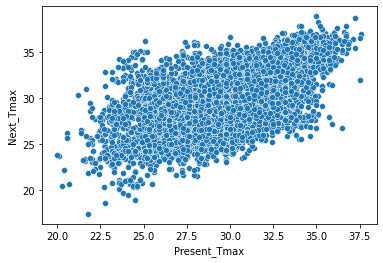

In [18]:
sns.scatterplot(x=df_temp['Present_Tmax'],y=df_temp['Next_Tmax'])

Present_Tmax and Next_Tmax has linear relationship to each others.

In [19]:
from scipy.stats import zscore
z_score=abs(zscore(df_temp))
print(df_temp.shape)
df_temp_final=df_temp.loc[(z_score<3).all(axis=1)]
print(df_temp_final.shape)

(7750, 27)
(6888, 27)


Less than 10% data is present as outliers which can be considered.

In [20]:
pip install -U dataprep

Requirement already up-to-date: dataprep in /usr/local/lib/python3.7/dist-packages (0.3.0)


DataPrep Report
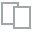
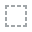
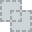
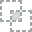
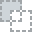
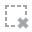
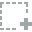
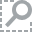
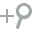
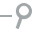
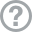
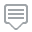
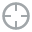
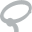
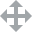
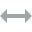
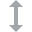
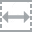
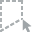
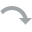
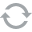
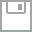
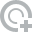
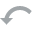
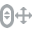
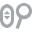
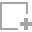
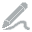
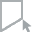
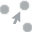
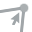
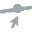

In [21]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df_temp_final)

Using Dataprep genrated all EDA and graphysically representations.

In [22]:
#lets divide the df_train into iput and output
df_x=df_temp_final.drop(columns=["Next_Tmax","Next_Tmin"])
y1=df_temp_final[["Next_Tmax"]]
y2=df_temp_final[["Next_Tmin"]]

There are two target value Next_Tmax and Next_Tmin beacuse we have divided target value sepratelly to bulid different modle for both target accordingly.

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model1 = ExtraTreesRegressor()
model1.fit(df_x,y1)
model2 = ExtraTreesRegressor()
model2.fit(df_x,y2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

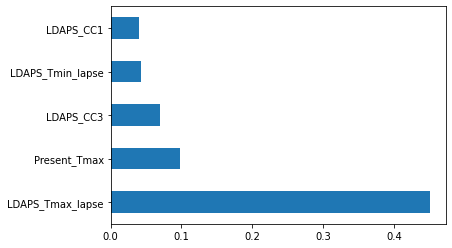

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model1.feature_importances_, index=df_x.columns)
feat_importances.nlargest(5).plot(kind='barh')

Displayed there are 5 most important features of Model1(Next_day_Tmin).

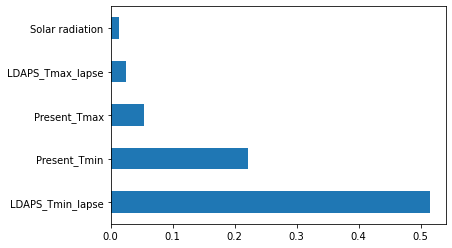

In [25]:
feat_importances = pd.Series(model2.feature_importances_, index=df_x.columns)
feat_importances.nlargest(5).plot(kind='barh')

Displayed there are 5 most important features of Model2(Next_day_Tmax).

In [26]:
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

station             0.002824
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            1.088575
LDAPS_LH            0.569060
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.700518
LDAPS_CC4           0.711008
LDAPS_PPT1          3.723069
LDAPS_PPT2          4.859920
LDAPS_PPT3          5.479300
LDAPS_PPT4          5.926613
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
Month              -0.683268
Day                 0.255377
Year                0.011207
dtype: float64
Total count of numeric features:  25
count of features which are significantly skewed:  15


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

Scalled datatset in same scale.

In [28]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

Create functions to predict max r2 score corresponding to random state.

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y1)

r2 score corresponding to  42  is  0.7562017912428628
r2 score corresponding to  43  is  0.7986964486856281
r2 score corresponding to  44  is  0.7779971468231537
r2 score corresponding to  45  is  0.7912166374028922
r2 score corresponding to  46  is  0.7770423714781352
r2 score corresponding to  47  is  0.7490430262368244
r2 score corresponding to  48  is  0.7438891656039268
r2 score corresponding to  49  is  0.7623036463292716
r2 score corresponding to  50  is  0.7404263715495227
r2 score corresponding to  51  is  0.7398068077349178
r2 score corresponding to  52  is  0.7664324038522644
r2 score corresponding to  53  is  0.7565733898881952
r2 score corresponding to  54  is  0.7551389368564727
r2 score corresponding to  55  is  0.7680212336317123
r2 score corresponding to  56  is  0.7504013505230787
r2 score corresponding to  57  is  0.7507797497941711
r2 score corresponding to  58  is  0.7693909720367065
r2 score corresponding to  59  is  0.7667795388119792
r2 score corresponding to  6

Using DecisionTreeRegressor max r2 score corresponding to  43  is  0.7986964486856281

In [32]:
#Lets chcek random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y1)
clf.best_params_

{'n_estimators': 500}

In [33]:
#lets chcek Random forest using n_estimators=500
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
#Lets chcek the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
r_state=maxr2_score(dtr,x,y1)

Random Forest Regressor


r2 score corresponding to  42  is  0.7591047268711357
r2 score corresponding to  43  is  0.7982898588916214
r2 score corresponding to  44  is  0.7780689798344542
r2 score corresponding to  45  is  0.795263642213552
r2 score corresponding to  46  is  0.7717355511002055
r2 score corresponding to  47  is  0.759679385767305
r2 score corresponding to  48  is  0.7543420566697915
r2 score corresponding to  49  is  0.7358573556832895
r2 score corresponding to  50  is  0.733473099839723
r2 score corresponding to  51  is  0.7500077320309291
r2 score corresponding to  52  is  0.771703955190144
r2 score corresponding to  53  is  0.7610502780143932
r2 score corresponding to  54  is  0.7438707611948224
r2 score corresponding to  55  is  0.7788461656121208
r2 score corresponding to  56  is  0.7707760372836634
r2 score corresponding to  57  is  0.7569544665641939
r2 score corresponding to  58  is  0.7703522756483607
r2 score corresponding to  59  is  0.7743747073916893
r2 sco

Using RandomForest Regressor max r2 score corresponding to  43  is  0.7982898588916214

In [34]:
#Lets chcek KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y1)
clf.best_params_

{'n_neighbors': 29}

In [36]:
knr=KNeighborsRegressor(n_neighbors=29)
maxr2_score(knr,x,y1)

r2 score corresponding to  42  is  0.8029578556855336
r2 score corresponding to  43  is  0.8134842588258923
r2 score corresponding to  44  is  0.8014669271927259
r2 score corresponding to  45  is  0.7961457289367733
r2 score corresponding to  46  is  0.8043389802758938
r2 score corresponding to  47  is  0.8063721922362492
r2 score corresponding to  48  is  0.795374254979476
r2 score corresponding to  49  is  0.8021467475705463
r2 score corresponding to  50  is  0.7973032540234865
r2 score corresponding to  51  is  0.8117254402503118
r2 score corresponding to  52  is  0.7880010772079645
r2 score corresponding to  53  is  0.7956269050216483
r2 score corresponding to  54  is  0.7965200640783126
r2 score corresponding to  55  is  0.8033728665864166
r2 score corresponding to  56  is  0.7941413392245935
r2 score corresponding to  57  is  0.8054009448244819
r2 score corresponding to  58  is  0.7956245191111002
r2 score corresponding to  59  is  0.7915032860273786
r2 score corresponding to  60

43

Using KNeighborsRegressor max r2 score corresponding to  43  is  0.813484258825892343

In [38]:
#lets chcek the SVM
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y1)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [39]:
svr=SVR(C=0.001,kernel="linear")
maxr2_score(svr,x,y1)

r2 score corresponding to  42  is  0.7317370476027819
r2 score corresponding to  43  is  0.7607981216826268
r2 score corresponding to  44  is  0.7242991771358951
r2 score corresponding to  45  is  0.726558205755806
r2 score corresponding to  46  is  0.7348264695309794
r2 score corresponding to  47  is  0.7505145689484451
r2 score corresponding to  48  is  0.7227199320613955
r2 score corresponding to  49  is  0.7468392177889182
r2 score corresponding to  50  is  0.7312751947476948
r2 score corresponding to  51  is  0.7424353787494913
r2 score corresponding to  52  is  0.7235117540595639
r2 score corresponding to  53  is  0.7062556259559658
r2 score corresponding to  54  is  0.7170821377113608
r2 score corresponding to  55  is  0.7279648110879928
r2 score corresponding to  56  is  0.7306964851116733
r2 score corresponding to  57  is  0.7321448279476259
r2 score corresponding to  58  is  0.7410503517169247
r2 score corresponding to  59  is  0.728114456178791
r2 score corresponding to  60 

43

Using SVR max r2 score corresponding to  43  is  0.7607981216826268
43

In [54]:
#random forest and KNN are peforming almost equally good,but KNN is faster so we will choose KNN as our Final model
#knr is model1
x_train, x_test, y1_train, y1_test = train_test_split(x, y1,random_state = 43,test_size=0.20)
knr1=KNeighborsRegressor(n_neighbors=29)
knr1.fit(x_train,y1_train)
y1_pred=knr.predict(x_test)

Trained Model1(Next_day_Tmin) and calculated predicted value.

In [55]:
#knr is model2
x_train, x_test, y2_train, y2_test = train_test_split(x, y2,random_state = 43,test_size=0.20)
knr2=KNeighborsRegressor(n_neighbors=29)
knr2.fit(x_train,y2_train)
y2_pred=knr.predict(x_test)

Trained Model2(Next_day_Tmax) and calculated predicted value.

In [56]:
print("RMSE is: ",np.sqrt(mean_squared_error(y1_test,y1_pred)))
print("r2_score is: ",r2_score(y1_test,y1_pred))

RMSE is:  7.793185413048777
r2_score is:  -6.058611452206703


RSME and R2_score displayed of Model1(Next_day_Tmin)

In [57]:
print("RMSE is: ",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print("r2_score is: ",r2_score(y2_test,y2_pred))

RMSE is:  1.0051566923652189
r2_score is:  0.8185152814972536


RSME and R2_score displayed of Model2(Next_day_Tmax)

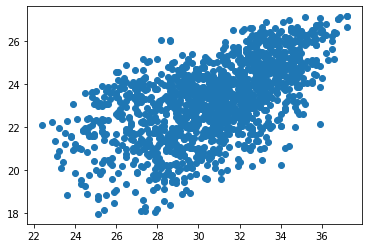

In [58]:
plt.scatter(y1_test,y1_pred)

As per aboveb displayed test and prediction data are linearly displayed of Model1(Next_day_Tmin).

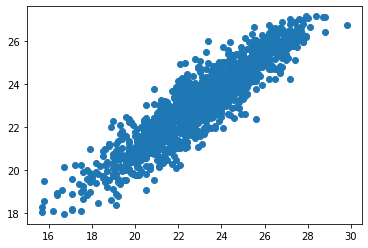

In [59]:
plt.scatter(y2_test,y2_pred)

As per aboveb displayed test and prediction data are linearly displayed of Model2(Next_day_Tmax).

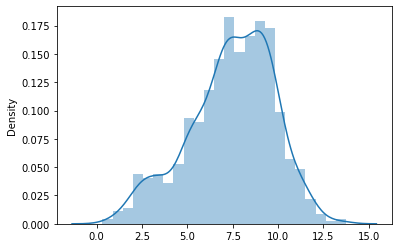

In [60]:
predictions=knr.predict(x_test)
sns.distplot(np.array(y1_test)-predictions)

As per aboveb prediction and test are normally distrubuted of model1(Next_day_Tmin).


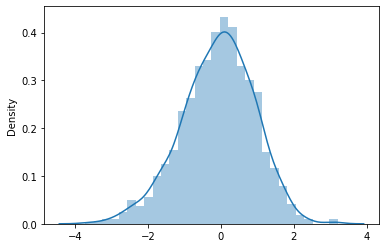

In [61]:
predictions=knr.predict(x_test)
sns.distplot(np.array(y2_test)-predictions)

As per aboveb prediction and test are normally distrubuted of model2(Next_day_Tmax).


In [62]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(knr1, 'knr1_temp_max.obj')
joblib.dump(knr2, 'knr2_temp_min.obj')
pickle.dump(knr1,open('knr1_temp_max.pkl','wb'))
pickle.dump(knr2,open('knr2_temp_min.pkl','wb'))

Dump the both module using both pickle and joblib.